# Vehicle Performance Prediction

### Abstract:
Most players in the automotive sector are investing in ML for their marketing efforts, a
much smaller group is putting in place incentives and key performance indicators
(KPIs) to use more ML and automation. Closing the gap requires a stronger commitment
to developing ML capability that is not just useful but also used.

### Problem Statement:
Use regression analysis to predict vehicle performance (mileage i.e kilometre travelled
per litre)

### Dataset Information:
The data is about the technical specifications of cars.  

* Kilometer_per_liter - distance in kilometre travelled per litre
* cylinders - No of cylinders
* displacement - displacement
* horsepower - A horsepower is a unit of measurement of power, or the rate at which work is done, usually in reference to the output of engines or motors.
* weight - Weight of car
* acceleration - Acceleration of Car
* model year - Model Year of the car
* origin - Country origin
* car name - Car brand and model name (unique for each instance)

### Scope:
* Exploratory data analysis
* Univariate and Bivariate Analysis
* Training linear regression model with SGD for prediction

### Learning Outcome:
The students will get a better understanding of how the variables are linked to each
other and how the EDA approach will help them gain more insights and knowledge
about the data that we have and train Linear Regression using SGD.

In [29]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.formula.api as sm
import statsmodels.api as sma

In [11]:
# Loading the dataset

df = pd.read_csv(r"Vehicle.csv")
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [12]:
# Basic EDA

print("Data types: \n", df.dtypes)
print("\n\n\n The shape of the data: \n,", df.shape)
print("\n\n\n Data description: \n\n", df.describe())

Data types: 
 origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object



 The shape of the data: 
, (398, 9)



 Data description: 

            origin   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean     1.572864    5.454774    193.425879  2970.424623     15.568090   
std      0.802055    1.701004    104.269838   846.841774      2.757689   
min      1.000000    3.000000     68.000000  1613.000000      8.000000   
25%      1.000000    4.000000    104.250000  2223.750000     13.825000   
50%      1.000000    4.000000    148.500000  2803.500000     15.500000   
75%      2.000000    8.000000    262.000000  3608.000000     17.175000   
max      3.000000    8.000000    455.

In [13]:
# Checking for null values

df.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [14]:
for i in df.columns:
    print({i:df[i].unique()})
    
# Here we try to check all unique values in every field to see if missing values are present as special-characters("?")

{'origin': array([1, 3, 2], dtype=int64)}
{'cylinders': array([8, 4, 6, 3, 5], dtype=int64)}
{'displacement': array([307. , 350. , 318. , 304. , 302. , 429. , 454. , 440. , 455. ,
       390. , 383. , 340. , 400. , 113. , 198. , 199. , 200. ,  97. ,
       110. , 107. , 104. , 121. , 360. , 140. ,  98. , 232. , 225. ,
       250. , 351. , 258. , 122. , 116. ,  79. ,  88. ,  71. ,  72. ,
        91. ,  97.5,  70. , 120. ,  96. , 108. , 155. ,  68. , 114. ,
       156. ,  76. ,  83. ,  90. , 231. , 262. , 134. , 119. , 171. ,
       115. , 101. , 305. ,  85. , 130. , 168. , 111. , 260. , 151. ,
       146. ,  80. ,  78. , 105. , 131. , 163. ,  89. , 267. ,  86. ,
       183. , 141. , 173. , 135. ,  81. , 100. , 145. , 112. , 181. ,
       144. ])}
{'horsepower': array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '

* We see that the field horsepower has a "?" and hence its dtype is shown as object
* We will replace it with NaN and treat it later.

In [15]:
df.replace('?', np.nan, inplace=True)

In [16]:
df.isnull().sum()

# We confirm that 6 "?" values were replaced with NaN in horsepower

origin                 0
cylinders              0
displacement           0
horsepower             6
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [17]:
df.drop_duplicates(inplace=True)
df.shape

# We confirm that no duplicates were removed as the shape remains the same.

(398, 9)

* The "horsepower" feature datatype is shown as object.
* We will convert its datatype to float, replace '?' with 'NaN' and convert its datatype back to int.

In [18]:
df['horsepower'] = df['horsepower'].astype(float)

In [19]:
df['horsepower'].fillna(round(df['horsepower'].mean()),inplace=True)
df['horsepower'] = df['horsepower'].astype(int)

In [20]:
df.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower               int32
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [21]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


Checking valuecounts of features 'name' and 'year' which are suspected to be less important and may have high cardinality.

In [22]:
print(df.name.value_counts())
print()
print(df.year.value_counts())

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: name, Length: 305, dtype: int64

1973    40
1978    36
1976    34
1982    31
1975    30
1970    29
1979    29
1980    29
1981    29
1971    28
1972    28
1977    28
1974    27
Name: year, dtype: int64


* We see that the field "name" and the "year" field have alot of unique categorical data (High Cardinality)
* We drop "name" and "year" as they are not very important.

In [23]:
df.drop(['name', 'year'], axis=1, inplace=True)
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,7.652587
1,1,8,350.0,165,3693,11.5,6.377156
2,1,8,318.0,150,3436,11.0,7.652587
3,1,8,304.0,150,3433,12.0,6.802299
4,1,8,302.0,140,3449,10.5,7.227443


# Assumption 1

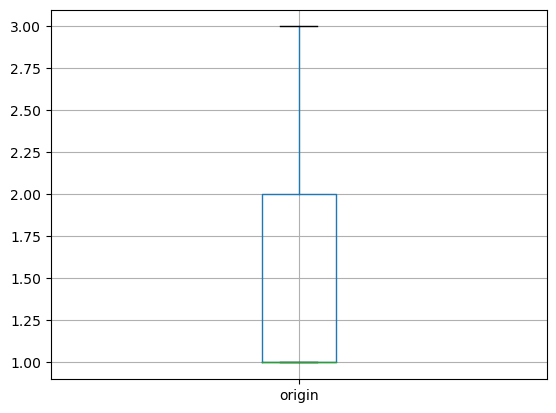

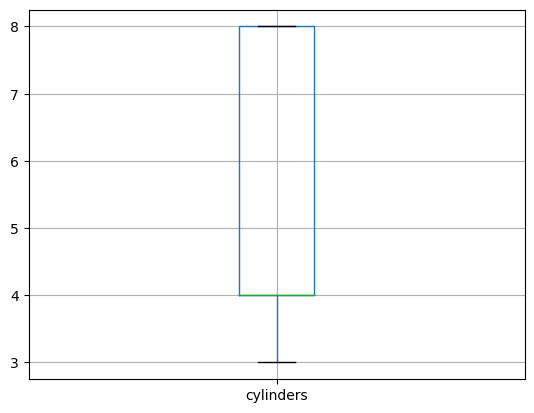

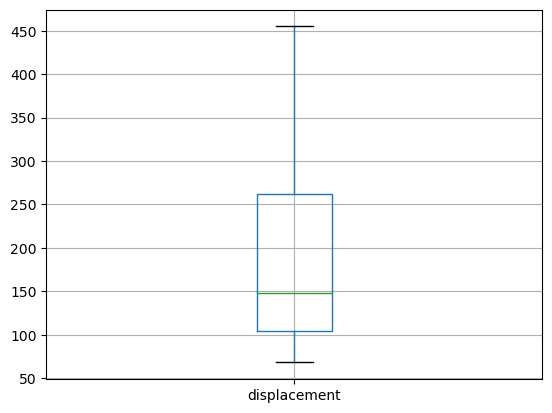

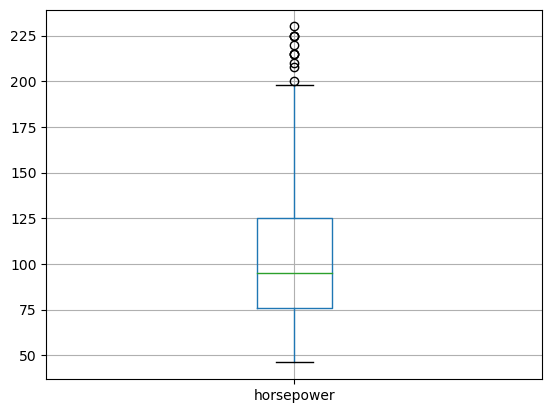

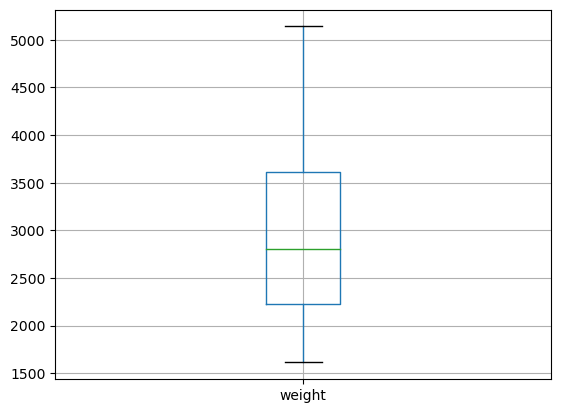

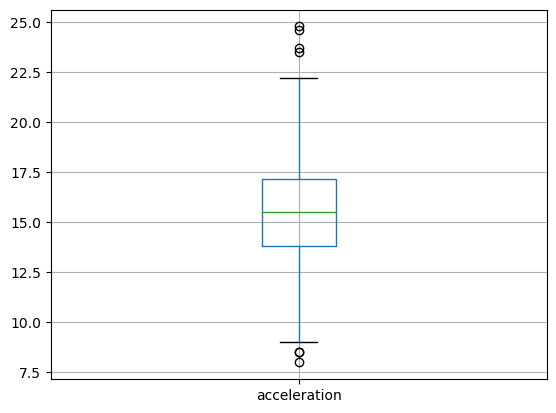

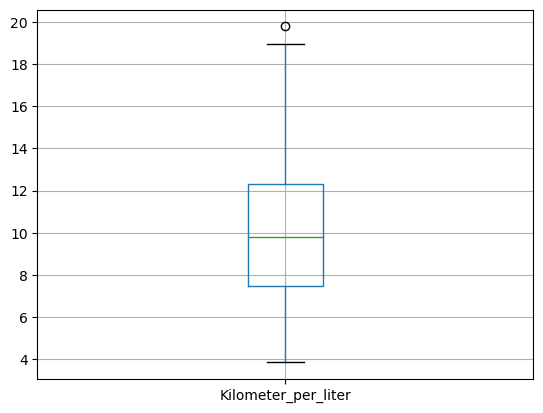

In [24]:
# Assumption 1: There should be no outliers in the data.
# Check using boxplot.

for i in df.columns:
    df.boxplot(column=i)
    plt.show()

In [25]:
# Checking column names

df.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'Kilometer_per_liter'],
      dtype='object')

# Assumption 2

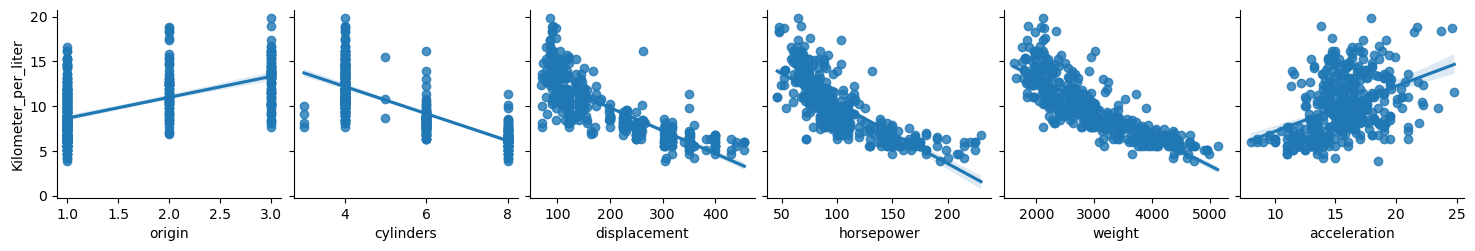

In [26]:
# Assumption 2: Assumption of linearity
# It states that every independent variables (X) should have a linear relationship with the dependent variable(Y).

sns.pairplot(df, x_vars=['origin', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'],
            y_vars="Kilometer_per_liter", kind='reg')
plt.show()

In [27]:
# Creating X and Y variables

X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]

In [28]:
# Checking shape of the Independent and Dependent variables.

print(X.shape, "\n")
print(Y.shape)

(398, 6) 

(398,)


# Assumption 3

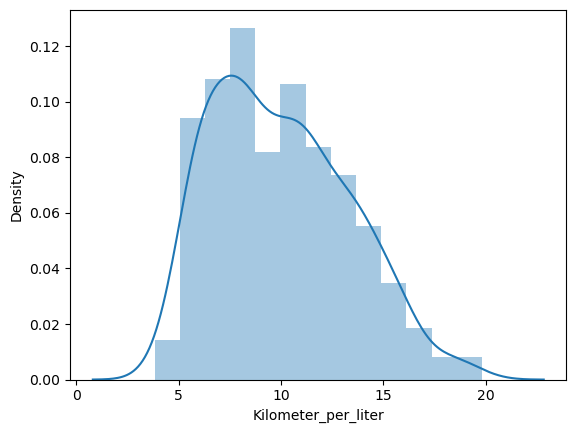

In [30]:
# Assumption 3: Assumption of Normality
# The dependent variable should follow an approximate normal distribution

sns.distplot(Y)
plt.show()

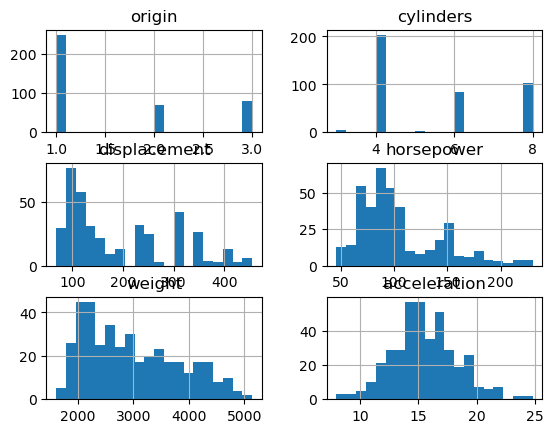

In [31]:
X.hist(bins=20)
plt.show()

In [32]:
# Checking for Skewness, detecting and log transforming highly skewed variables

#from scipy.stats import skew

# Finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))   # apply will iterate through X, 'i' will take each column once

# Subsetting the variabls that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > 0.75) | (data_num_skew < -0.75)]

print(data_num_skew, "\n\n")
print(data_num_skewed)

# apply log + 1 transformation for all numeric features with skewness over 0.75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

origin          0.920291
cylinders       0.524934
displacement    0.716930
horsepower      1.091972
weight          0.529059
acceleration    0.277725
dtype: float64 


origin        0.920291
horsepower    1.091972
dtype: float64


In [34]:
# Confirming if skewness is treated.

data_num_skew = X.apply(lambda i: skew(i.dropna()))   # apply will iterate through X, 'i' will take each column once

# Subsetting the variabls that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > 0.75) | (data_num_skew < -0.75)]

print(data_num_skew, "\n\n")
print(data_num_skewed)

origin          0.793535
cylinders       0.524934
displacement    0.716930
horsepower      0.371392
weight          0.529059
acceleration    0.277725
dtype: float64 


origin    0.793535
dtype: float64


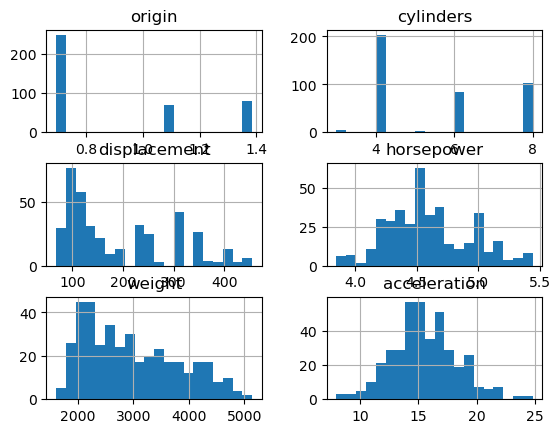

In [33]:
# Confirming the same graphically

X.hist(bins=20)
plt.show()

* We see that 'horsepower' variable shows an acceptable skewness.
* The 'Origin' variable is a categorical/discrete variable and hence we can ignore its skewness.

# Assumption 4

                origin  cylinders  displacement  horsepower    weight  \
origin        1.000000  -0.577813     -0.625290   -0.494885 -0.591615   
cylinders    -0.577813   1.000000      0.950721    0.837671  0.896017   
displacement -0.625290   0.950721      1.000000    0.881559  0.932824   
horsepower   -0.494885   0.837671      0.881559    1.000000  0.871061   
weight       -0.591615   0.896017      0.932824    0.871061  1.000000   
acceleration  0.217409  -0.505419     -0.543684   -0.691616 -0.417457   

              acceleration  
origin            0.217409  
cylinders        -0.505419  
displacement     -0.543684  
horsepower       -0.691616  
weight           -0.417457  
acceleration      1.000000  


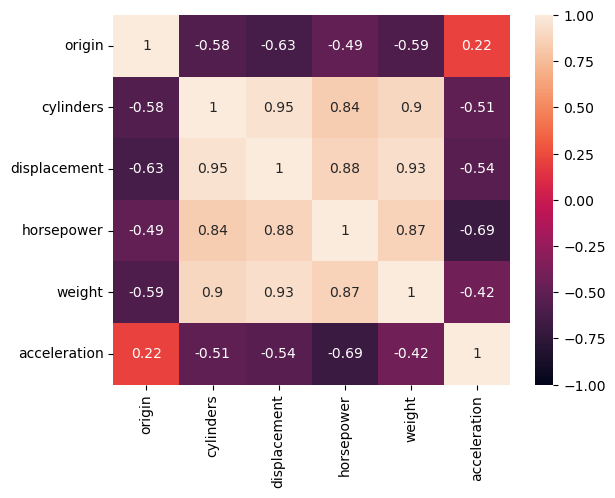

In [37]:
# Assumption of no multicollinearity: There should be no multicollinearity between the independent variables.
# Multicollinearity is the relationship amongst the independent variables

corr_df=X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True) 

plt.show()

In [38]:
# Creating a DF with the VIF values.

#from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns

vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]

vif_df.sort_values("VIF Factor",ascending=False, inplace=True)

vif_df.round(2)

,features,VIF Factor
3,horsepower,134.38
4,weight,124.58
1,cylinders,117.87
2,displacement,87.93
5,acceleration,37.51
0,origin,18.85


### Splitting the data into training data and testing data

In [39]:
#from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [43]:
# 80% Data for training
print("Shape of X_train:", X_train.shape)  # 318 rows, 6 dependent col
print("Shape of Y_train:", Y_train.shape, "\n")  # 318 rows, 1 col

# 20% Data for testing.
print("Shape of X_test:", X_test.shape)   # 80 rows, 6 dependent col
print("Shape of Y_test:", Y_test.shape, "\n")   # 80 rows, 1 col

# Printing Percentage of train data => 80%
print("Percent of train data",X_train.shape[0]/X.shape[0]*100)

Shape of X_train: (318, 6)
Shape of Y_train: (318,) 

Shape of X_test: (80, 6)
Shape of Y_test: (80,) 

Percent of train data 79.89949748743719


In [56]:
# Model building - Base Linear Regression

#from sklearn.linear_model import LinearRegression

# Creating a model object
lm = LinearRegression()

# Training the model
lm.fit(X_train, Y_train)

# Printing the intercept and coefficients (Parameters)
print(lm.intercept_)
print(lm.coef_)

38.199665757613644
[ 1.55650855e+00 -1.63907835e-01  2.17976681e-03 -5.04456947e+00
 -1.31674631e-03 -1.26968433e-01]


In [57]:
# Pairing the feature names with the coefficients
print(list(zip(X.columns, lm.coef_)))

[('origin', 1.556508549928309), ('cylinders', -0.16390783458666608), ('displacement', 0.002179766807637689), ('horsepower', -5.044569470533456), ('weight', -0.0013167463051625417), ('acceleration', -0.1269684331135569)]


In [58]:
# Predicting using our trained model
Y_pred = lm.predict(X_test)

In [59]:
#from sklearn.metrics import r2_score,mean_squared_error
#import numpy as np

r2=r2_score(Y_test,Y_pred)  # R-Square value
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE:", rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7173608714607322
RMSE: 1.7675344121659833
Adj R-square: 0.713023698132764


In [60]:
# Building Ridge model

#from sklearn.linear_model import Ridge
lm = Ridge(alpha=1.0)  # default: alpha = 1
lm.fit(X_train, Y_train)

# Printing the intercept and coefficients (Parameters)
print(lm.intercept_)
print(lm.coef_)

33.62480500432326
[ 1.42893844e+00 -1.46868642e-01  1.44291786e-03 -4.00234105e+00
 -1.58481483e-03 -7.89118480e-02]


In [61]:
Y_pred_ridge = lm.predict(X_test)

In [62]:
#from sklearn.metrics import r2_score, mean_squared_error
#import numpy as np

r2=r2_score(Y_test,Y_pred_ridge)  # R-Square value
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_ridge))
print("RMSE:", rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7161567982252608
RMSE: 1.7712953547337138
Adj R-square: 0.7118011480701497


In [63]:
# Building Lasso model

#from sklearn.linear_model import Lasso
lm = Lasso()
lm.fit(X_train, Y_train)

# Printing the intercept and coefficients (Parameters)
print(lm.intercept_)
print(lm.coef_)

18.756291910551248
[ 0.         -0.         -0.00657137 -0.         -0.00249468  0.        ]


In [64]:
Y_pred_lasso = lm.predict(X_test)

In [65]:
#from sklearn.metrics import r2_score, mean_squared_error
#import numpy as np

r2=r2_score(Y_test,Y_pred_lasso)  # R-Square value
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_lasso))
print("RMSE:", rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.678820766105701
RMSE: 1.884193338727427
Adj R-square: 0.673892184511415


Basic linear:  
R-squared: 0.7173608714607322  
RMSE: 1.7675344121659833  
Adj R-square: 0.713023698132764  


Ridge:  
R-squared: 0.7161567982252608  
RMSE: 1.7712953547337138  
Adj R-square: 0.7118011480701497  


Lasso:  
R-squared: 0.678820766105701  
RMSE: 1.884193338727427  
Adj R-square: 0.673892184511415  

* We see that the Base Linear Model gives us the highest R-square and adjusted r-squared values and the minimum RMSE.

In [67]:
# Creating a DataFrame for test data and predicted Mileage.

new_df=pd.DataFrame()
new_df=X_test.copy()

new_df["Actual Mileage"]=Y_test
new_df["Predicted Mileage"]=Y_pred
new_df=new_df.reset_index().drop("index", axis=1)
new_df["Deviation"] = abs(new_df["Actual Mileage"] - new_df["Predicted Mileage"])
new_df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,Actual Mileage,Predicted Mileage,Deviation
0,1.386294,4,97.0,4.219508,2145,18.0,14.369857,13.517798,0.852059
1,1.386294,3,70.0,4.510860,2124,13.5,7.652587,12.752118,5.099531
2,0.693147,4,105.0,4.158883,2215,14.9,14.752487,13.063602,1.688885
3,1.386294,4,97.0,4.330733,2155,16.4,11.904024,13.146695,1.242671
4,0.693147,4,91.0,4.262680,1955,20.5,11.053736,12.140806,1.087070


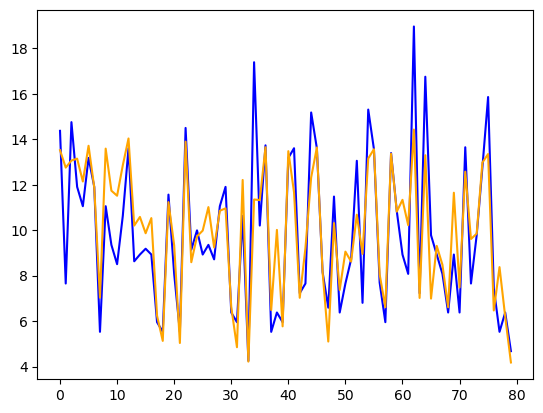

In [68]:
# Graphical representation.

new_df["Actual Mileage"].plot(color='blue')
new_df["Predicted Mileage"].plot(color='orange')
plt.show()

#### Creating a sample dataframe to hold just the training data for the OLS model.

In [69]:
new_ols_df=pd.DataFrame()
new_ols_df=X_train.copy()

new_ols_df["Actual_Mileage"]=Y_train
new_ols_df=new_ols_df.reset_index().drop("index", axis=1)

#### Building OLS model using statsmodels library. We will check the summary to evaluate.<br>

Checking for the Assumption : No autocorrelation 

In [73]:
#import statsmodels.formula.api as sm
ols = sm.ols('Actual_Mileage~origin+cylinders+displacement+horsepower+weight+acceleration',data=new_ols_df).fit()

# print the coefficients
print(ols.params)
print(ols.summary())

Intercept       38.199666
origin           1.556509
cylinders       -0.163908
displacement     0.002180
horsepower      -5.044569
weight          -0.001317
acceleration    -0.126968
dtype: float64
                            OLS Regression Results                            
Dep. Variable:         Actual_Mileage   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     149.3
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           1.90e-88
Time:                        15:34:29   Log-Likelihood:                -616.81
No. Observations:                 318   AIC:                             1248.
Df Residuals:                     311   BIC:                             1274.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
             

In [74]:
# Predicting using the OLS model
Y_pred_new = ols.predict(X_test)

#from sklearn.metrics import r2_score, mean_squared_error
#import numpy as np

r2=r2_score(Y_test,Y_pred_new)  # R-Square value
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_new))
print("RMSE:", rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7173608714607628
RMSE: 1.767534412165888
Adj R-square: 0.7130236981327949


### Assumption 5

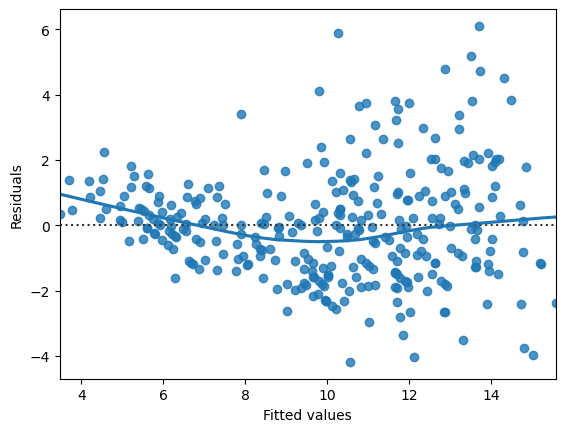

In [76]:
# Assumption 5: Errors should be random
# Checked using Residual v/s Fitted plot

model_fitted_y = ols.fittedvalues
sns.residplot(x=model_fitted_y, y='Actual_Mileage', data=new_ols_df, lowess=True)  # lowess=True is to plot the curved line.
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# The line should be a random line and should not follow a wave like pattern.

### Assumption 6

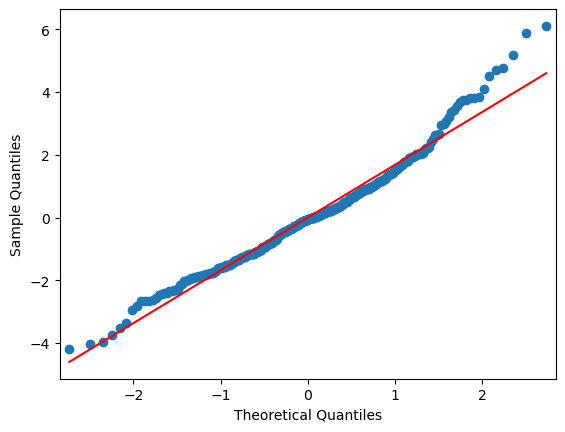

In [77]:
# Assumption 6: Errors should follow an approximate normal distribution
# Checked using Normal QQ plot (Quantile-Quantile Plot).

#import statsmodels.api as sma
sma.qqplot(ols.resid, line='s')  # line='s' > standardized line
plt.show()

# The error points should follow the red diagonal line, if not, then the errrors are skewed.

### Assumption 7

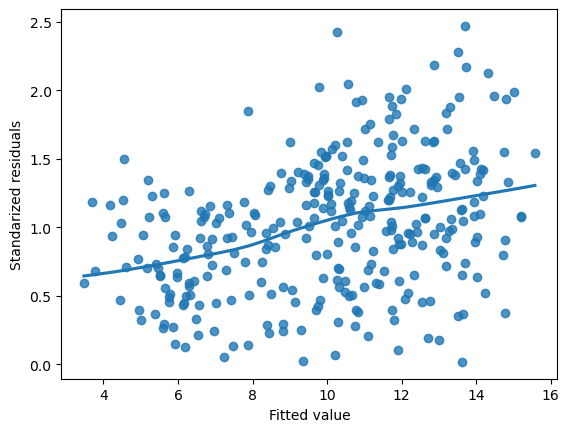

In [78]:
# Assumption 7: Errors should follow a constant variance-->Homoskedasticity
# Checked using Scale location plot

model_norm_residuals_abs_sqrt=np.sqrt(np.abs(ols.resid))

sns.regplot(x=ols.fittedvalues, y=model_norm_residuals_abs_sqrt, scatter=True, lowess=True)        
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()

# The line follows a slight curve and not a steep V like curve
# Hence, we confirm that the errors follow a constant variance

* We go ahead and finalise the model
* We will predict the values and dump it to a csv.

In [ ]:
# Re-creating a base Linear Regression model object
lm = LinearRegression()

# Training the model
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

In [79]:
# Creating a dataframe with X_test, Y_test ,Y-pred values and the deviation.

new_df=pd.DataFrame()
new_df=X_test.copy()

new_df["Actual Mileage"]=Y_test
new_df["Predicted Mileage"]=Y_pred
new_df=new_df.reset_index().drop("index", axis=1)

new_df["Deviation"] = abs(new_df["Actual Mileage"] - new_df["Predicted Mileage"])

new_df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,Actual Mileage,Predicted Mileage,Deviation
0,1.386294,4,97.0,4.219508,2145,18.0,14.369857,13.517798,0.852059
1,1.386294,3,70.0,4.510860,2124,13.5,7.652587,12.752118,5.099531
2,0.693147,4,105.0,4.158883,2215,14.9,14.752487,13.063602,1.688885
3,1.386294,4,97.0,4.330733,2155,16.4,11.904024,13.146695,1.242671
4,0.693147,4,91.0,4.262680,1955,20.5,11.053736,12.140806,1.087070


In [80]:
new_df.to_csv("Predicted_Mileage.csv")

### End of project